In [1]:
import cv2
import numpy as np
import math
import datetime
from matplotlib import pyplot as plt

In [2]:
def Points():
	x_hours = []  # Create list empty to put the point ( x , y ) in x
	y_hours = []  # Create list empty to put the point ( x , y ) in y

	for i in range(0,360,6):  # loop to calculate coordinates the point 
		x0 = int(500 + 250 * math.cos(i * math.pi / 180))
		y0 = int(500 + 250 * math.sin(i * math.pi / 180))
		x_hours.append((x0,y0))

	for i in range(0,360,6):  # loop to calculate coordinates the point
		x0 = int(500 + 250 * math.cos(i * math.pi / 180))
		y0 = int(500 + 250 * math.sin(i * math.pi / 180))

		y_hours.append((x0,y0))

	return x_hours, y_hours


In [3]:
def HandClock(image):  # Function for drawing the hands of the clock

	timenow = datetime.datetime.now().time()  # the line is calculate the now time
	hour = int(math.fmod(timenow.hour , 12))  # the line is calculate the time to 12 
	min = timenow.minute
	sec = timenow.second

    # These are  lines to calculate and draw the time the clock is moving
	HoursAngle = math.fmod((hour * 30) + (min / 2) + 270 , 360)
	MinuteAngle = math.fmod(min * 6 + 270 , 360)
	SecondAngle = math.fmod(sec * 6 + 270 , 360)

	hx = int(500 + (250-90) * math.cos(HoursAngle * math.pi / 180))
	hy = int(500 + (250-90) * math.sin(HoursAngle * math.pi / 180))
	cv2.line(image, (500,500), (hx, hy), (0,0,255), 6)
	
	mx = int(500 + (250 - 60) * math.cos(MinuteAngle * math.pi / 180))
	my = int(500 + (250 - 60) * math.sin(MinuteAngle * math.pi / 180))
	cv2.line(image, (500,500), (mx, my), (0,0,255), 3)

	sx = int(500 + (250 - 25) * math.cos(SecondAngle * math.pi / 180))
	sy = int(500 + (250 - 25) * math.sin(SecondAngle * math.pi / 180))
	cv2.line(image, (500,500), (sx, sy), (255,255,255), 2)

	cv2.circle(image , (500,500) , 5 , ((100,0,255)) , -1)
	

	time = str(hour) + ':' + str(min) + ':' + str(sec)  # Convert the time from an int to a string for it to print the image
	date = str(datetime.datetime.now().date())  # Calculate the date now
    
	# print the Date and Time in the image
	cv2.putText(image , 'Date:' , (20 , 120) , cv2.FONT_HERSHEY_SCRIPT_COMPLEX , 1.6 , (0,0,255) , 1 , cv2.LINE_AA)
	cv2.putText(image , date , (150 , 120) , cv2.FONT_HERSHEY_SCRIPT_COMPLEX , 1.6 , (255,255,255) , 1 , cv2.LINE_AA)
	cv2.putText(image , 'Time:' ,  (20 , 60) , cv2.FONT_HERSHEY_SCRIPT_COMPLEX , 1.6 , (0,0,255) , 1 , cv2.LINE_AA)
	cv2.putText(image , time , (150 , 65) , cv2.FONT_HERSHEY_SCRIPT_COMPLEX , 1.6 , (255,255,255) , 1 , cv2.LINE_AA)
	
	return image

In [4]:
image = np.zeros((1000,1000,3), dtype=np.uint8)   # create image
image[:] = [45,45,45]   # the background is white.

fhours , lhours = Points() # Call the function to use print the small lines

for i in range(len(fhours)):  # Draw all the Points and Lines using for loop
    if i % 5 == 0 :
        cv2.circle(image , fhours[i] , 8 , (0,0,255) , 2)
    else:
        cv2.circle(image , fhours[i] , 4 , (255,255,255) , -1)

cv2.circle(image , (500,500) , 250  , (0,0,0) , 2 ) # Draw body the watch

'''
cv2.imshow('point' , image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image[:,:,::-1]);

'''

"\ncv2.imshow('point' , image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\nplt.imshow(image[:,:,::-1]);\n\n"

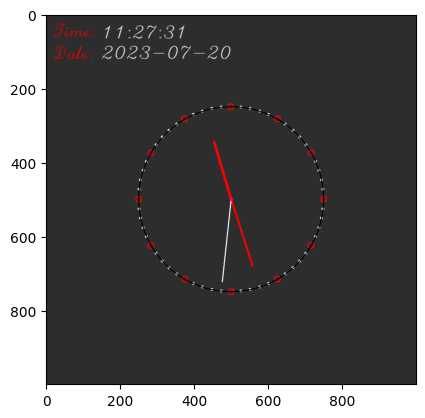

In [5]:
while 1:
	copyimage = image.copy()

	#Use draw time to make clock hands on the canvas
	newimage = HandClock(copyimage)

	#Show the watch
	cv2.imshow('Clock Window', copyimage)

	k = cv2.waitKey(1)
	if k == ord('q'):
		break

cv2.destroyAllWindows()
plt.imshow(newimage[:,:,::-1]);